# Importing all the libraries and building up the model

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

## Step 1: Reading and understanding data

In [2]:
#Importing dataset
car_data= pd.read_csv('CarPrice_Assignment.csv')

In [3]:
#checking the shape of the dataframe
car_data.shape

(205, 26)

In [4]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### 1.a. Cleaning of the data i.e dropping unnecessary columns

In [7]:
#cleaning of the data
car_data.drop(['car_ID'],axis=1,inplace = True)

In [8]:
car_data[['Car_name','Car_company']] = car_data['CarName'].str.split(n=1,expand = True)

In [9]:
car_data.drop(['Car_company'],axis=1,inplace = True)

In [10]:
car_data.Car_name.unique() 

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### 1.b. Correcting the spelling errors in the dataframe

In [11]:
car_data['Car_name'] = car_data['Car_name'].replace(to_replace = 'maxda' , value = 'mazda')
car_data['Car_name'] = car_data['Car_name'].replace(to_replace = 'nissan' , value = 'Nissan')
car_data['Car_name'] = car_data['Car_name'].replace(to_replace = 'porcshce' , value = 'porsche')
car_data['Car_name'] = car_data['Car_name'].replace(to_replace = 'toyouta' , value = 'toyota')
car_data['Car_name'] = car_data['Car_name'].replace(to_replace = ['vokswagen','vw'] , value = 'volkswagen')

In [12]:
car_data.Car_name.unique() 

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
car_data.drop(['CarName'],axis=1,inplace = True)

In [14]:
#correcting the format
car_data['drivewheel'] = car_data['drivewheel'].replace(to_replace = '4wd' , value = 'fwd')

## Step 2: Converting the categorical variables

### 2.a Creating dummy variables for binary as well as other categorical variables

In [15]:
car_data['doornumber'].unique() 

array(['two', 'four'], dtype=object)

In [16]:
car_data['cylindernumber'].unique() 

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

### 2.b Converting doornumber and cylinder number so that later it can be identified

In [17]:
varlist=['doornumber']
car_data[varlist] = car_data[varlist].apply(lambda x:x.map({'two':'two_door','four':'four_door'}))

In [18]:
varlist=['cylindernumber']
car_data[varlist] = car_data[varlist].apply(lambda x:x.map({'two':'two_cyl','four':'four_cyl','three':'three_cyl','five':'five_cyl','six':'six_cyl','eight':'eight_cyl','twelve':'twelve_cyl'}))

In [19]:
#creating dummy variables since we have 11 categorical columns
status = pd.get_dummies(car_data['fuelsystem'],drop_first = True)
car_data = pd.concat([car_data,status],axis = 1)
car_data.drop(['fuelsystem'],axis=1,inplace=True)

status = pd.get_dummies(car_data['enginetype'],drop_first = True)
car_data = pd.concat([car_data,status],axis = 1)
car_data.drop(['enginetype'],axis=1,inplace=True)

status = pd.get_dummies(car_data['carbody'],drop_first = True)
car_data = pd.concat([car_data,status],axis = 1)
car_data.drop(['carbody'],axis=1,inplace=True)

status = pd.get_dummies(car_data['Car_name'],drop_first = True)
car_data = pd.concat([car_data,status],axis = 1)
car_data.drop(['Car_name'],axis=1,inplace=True)

status = pd.get_dummies(car_data['symboling'],drop_first = True)
car_data = pd.concat([car_data,status],axis = 1)
car_data.drop(['symboling'],axis=1,inplace=True)

status = pd.get_dummies(car_data['cylindernumber'],drop_first = True)
car_data = pd.concat([car_data,status],axis = 1)
car_data.drop(['cylindernumber'],axis=1,inplace=True)

status = pd.get_dummies(car_data['fueltype'],drop_first = True)
car_data = pd.concat([car_data,status],axis = 1)
car_data.drop(['fueltype'],axis=1,inplace=True)

status = pd.get_dummies(car_data['aspiration'],drop_first = True)
car_data = pd.concat([car_data,status],axis = 1)
car_data.drop(['aspiration'],axis=1,inplace=True)

status = pd.get_dummies(car_data['drivewheel'],drop_first = True)
car_data = pd.concat([car_data,status],axis = 1)
car_data.drop(['drivewheel'],axis=1,inplace=True)

status = pd.get_dummies(car_data['enginelocation'],drop_first = True)
car_data = pd.concat([car_data,status],axis = 1)
car_data.drop(['enginelocation'],axis=1,inplace=True)

status = pd.get_dummies(car_data['doornumber'],drop_first = True)
car_data = pd.concat([car_data,status],axis = 1)
car_data.drop(['doornumber'],axis=1,inplace=True)


In [20]:
car_data.shape

(205, 68)

In [21]:
car_data.columns

Index([       'wheelbase',        'carlength',         'carwidth',
              'carheight',       'curbweight',       'enginesize',
              'boreratio',           'stroke', 'compressionratio',
             'horsepower',          'peakrpm',          'citympg',
             'highwaympg',            'price',             '2bbl',
                   '4bbl',              'idi',              'mfi',
                   'mpfi',             'spdi',             'spfi',
                  'dohcv',                'l',              'ohc',
                   'ohcf',             'ohcv',            'rotor',
                'hardtop',        'hatchback',            'sedan',
                  'wagon',      'alfa-romero',             'audi',
                    'bmw',            'buick',        'chevrolet',
                  'dodge',            'honda',            'isuzu',
                 'jaguar',            'mazda',          'mercury',
             'mitsubishi',          'peugeot',         'plymou

## Step 3 : Training the data

In [22]:
#splitting the dataframe into test and train dataframe 
df_train,df_test = train_test_split(car_data,train_size = 0.7 ,random_state = 100)

In [23]:
df_train.shape

(143, 68)

In [24]:
df_test.shape

(62, 68)

In [25]:
#instantiate an object
scaler = MinMaxScaler()
#create a list of only numeric variables
num_var = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [26]:
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,four_cyl,six_cyl,three_cyl,twelve_cyl,two_cyl,gas,turbo,rwd,rear,two_door
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,1,0,0,0,0,1,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,1,0,0,0,0,1,0,1,0,1
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,1,0,0,0,0,1,0,1,0,1
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,1,0,0,0,0,1,0,1,0,1
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,1,0,0,0,0,1,1,1,0,0


### Dividing the data to x_train and y_train

In [27]:
#defining x_train,y_train
y_train = df_train.pop('price')
x_train = df_train

## Step 4 : Building the model 

In [28]:
#building the model
#importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### 4.a Recursive Feature Elimination

In [29]:
lm = LinearRegression()
#fitting the training dataframe
lm.fit(x_train,y_train)
#applying the linear regression model
rfe = RFE(lm,20)
rfe = rfe.fit(x_train,y_train)


In [30]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 7),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('carheight', False, 8),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 15),
 ('horsepower', False, 5),
 ('peakrpm', False, 6),
 ('citympg', False, 25),
 ('highwaympg', False, 16),
 ('2bbl', False, 24),
 ('4bbl', False, 29),
 ('idi', False, 19),
 ('mfi', False, 47),
 ('mpfi', False, 42),
 ('spdi', False, 43),
 ('spfi', False, 46),
 ('dohcv', False, 2),
 ('l', True, 1),
 ('ohc', False, 41),
 ('ohcf', True, 1),
 ('ohcv', False, 32),
 ('rotor', True, 1),
 ('hardtop', False, 21),
 ('hatchback', False, 20),
 ('sedan', False, 22),
 ('wagon', False, 23),
 ('alfa-romero', False, 30),
 ('audi', False, 26),
 ('bmw', True, 1),
 ('buick', False, 34),
 ('chevrolet', False, 13),
 ('dodge', False, 10),
 ('honda', False, 12),
 ('isuzu', False, 38),
 ('jaguar', False, 17),
 ('mazda', False, 45),
 ('mercury', False, 48),
 ('mitsubishi', False, 3),

In [31]:
col = x_train.columns[rfe.support_]

In [32]:
#checkinhg the columns in the train dataframe
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'l',
       'ohcf', 'rotor', 'bmw', 'peugeot', 'porsche', 'saab', 'subaru', 'volvo',
       'five_cyl', 'four_cyl', 'three_cyl', 'twelve_cyl', 'two_cyl', 'rear'],
      dtype='object')

## 4.b Feature selection via Statsmodel 

In [33]:
x_train_rfe = x_train[col]

In [34]:
#adding a constant variable
x_train_rfe = sm.add_constant(x_train_rfe)

In [35]:
lm = sm.OLS(y_train,x_train_rfe).fit()

In [36]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           6.19e-71
Time:                        14:17:34   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3017      0.040     -7.616      0.0

In [37]:
x_train_rfe.columns

Index(['const', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'l', 'ohcf', 'rotor', 'bmw', 'peugeot', 'porsche', 'saab', 'subaru',
       'volvo', 'five_cyl', 'four_cyl', 'three_cyl', 'twelve_cyl', 'two_cyl',
       'rear'],
      dtype='object')

In [38]:
#dropping const variable from the train dataset
x_train_new = x_train_rfe.drop(['const'],axis = 1)

### 4.a Checking the VIF

In [39]:
#checking vif after rfe
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
19,rear,inf
12,subaru,inf
18,two_cyl,inf
5,l,inf
6,ohcf,inf
7,rotor,inf
16,three_cyl,inf
9,peugeot,inf
2,enginesize,102.74
1,curbweight,59.18


## 4.b. Dropping columns with vif = infinite i.e. using statmodel

In [40]:
#vif of rear is inf and p value is also greater than 0.05 so dropping it
x_train_new = x_train_new.drop(["subaru"], axis = 1)

In [41]:
x_train_new.columns

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'l',
       'ohcf', 'rotor', 'bmw', 'peugeot', 'porsche', 'saab', 'volvo',
       'five_cyl', 'four_cyl', 'three_cyl', 'twelve_cyl', 'two_cyl', 'rear'],
      dtype='object')

In [42]:
x_train_rfe = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           6.19e-71
Time:                        14:17:35   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3017      0.040     -7.616      0.0

In [43]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
9,peugeot,inf
17,two_cyl,inf
5,l,inf
15,three_cyl,inf
7,rotor,inf
2,enginesize,102.74
1,curbweight,59.18
3,boreratio,53.00
0,carwidth,46.35
4,stroke,34.65


In [44]:
#p value of ohcf is high so dropping it
x_train_new = x_train_new.drop(["ohcf"], axis = 1)

In [45]:
x_train_rfe = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           2.89e-71
Time:                        14:17:35   Log-Likelihood:                 224.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     126   BIC:                            -364.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2706      0.036     -7.455      0.0

In [46]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
5,l,inf
6,rotor,inf
16,two_cyl,inf
8,peugeot,inf
14,three_cyl,inf
2,enginesize,97.01
1,curbweight,59.18
0,carwidth,43.71
3,boreratio,37.47
4,stroke,31.18


In [47]:
#vif of l is inf so dropping it
x_train_new = x_train_new.drop(["l"], axis = 1)

In [48]:
x_train_rfe = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           2.89e-71
Time:                        14:17:36   Log-Likelihood:                 224.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     126   BIC:                            -364.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2706      0.036     -7.455      0.0

In [49]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
5,rotor,inf
15,two_cyl,inf
2,enginesize,97.01
1,curbweight,59.18
0,carwidth,43.71
3,boreratio,37.47
4,stroke,31.18
12,four_cyl,26.44
11,five_cyl,3.14
14,twelve_cyl,2.95


In [50]:
#vif of rotor is high so dropping it
x_train_new = x_train_new.drop(["rotor"], axis = 1)

In [51]:
x_train_rfe = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           2.89e-71
Time:                        14:17:36   Log-Likelihood:                 224.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     126   BIC:                            -364.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2706      0.036     -7.455      0.0

In [52]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
2,enginesize,97.01
1,curbweight,59.18
0,carwidth,43.71
3,boreratio,37.47
4,stroke,31.18
11,four_cyl,26.44
14,two_cyl,4.55
10,five_cyl,3.14
13,twelve_cyl,2.95
7,porsche,2.03


In [53]:
#vif of enginesize is high so dropping it
x_train_new = x_train_new.drop(["enginesize"], axis = 1)

In [54]:
x_train_rfe = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     86.57
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           4.59e-59
Time:                        14:17:37   Log-Likelihood:                 189.84
No. Observations:                 143   AIC:                            -347.7
Df Residuals:                     127   BIC:                            -300.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1607      0.043     -3.709      0.0

In [55]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,carwidth,40.84
1,curbweight,40.74
2,boreratio,22.54
3,stroke,17.42
10,four_cyl,10.23
6,porsche,1.98
9,five_cyl,1.76
14,rear,1.62
5,peugeot,1.52
13,two_cyl,1.37


In [56]:
# p value of four_cyl is high and p value is also high so dropping it
x_train_new = x_train_new.drop(["four_cyl"], axis = 1)

In [57]:
x_train_rfe = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     93.43
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           4.81e-60
Time:                        14:17:37   Log-Likelihood:                 189.81
No. Observations:                 143   AIC:                            -349.6
Df Residuals:                     128   BIC:                            -305.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1689      0.029     -5.777      0.0

In [58]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,carwidth,40.35
1,curbweight,23.53
2,boreratio,11.53
3,stroke,8.89
6,porsche,1.87
13,rear,1.62
9,five_cyl,1.55
5,peugeot,1.37
8,volvo,1.25
11,twelve_cyl,1.19


In [59]:
# p value of stroke is high and p value is also high so dropping it
x_train_new = x_train_new.drop(["stroke"], axis = 1)

In [60]:
x_train_rfe = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           5.81e-61
Time:                        14:17:37   Log-Likelihood:                 189.56
No. Observations:                 143   AIC:                            -351.1
Df Residuals:                     129   BIC:                            -309.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1824      0.021     -8.719      0.0

In [61]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,carwidth,28.10
1,curbweight,23.34
2,boreratio,11.51
5,porsche,1.66
12,rear,1.58
8,five_cyl,1.45
4,peugeot,1.24
3,bmw,1.15
7,volvo,1.14
10,twelve_cyl,1.09


In [62]:
#p value of volvo is very high so removing it
x_train_new = x_train_new.drop(["volvo"], axis = 1)

In [63]:
x_train_rfe = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     110.3
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           5.49e-62
Time:                        14:17:38   Log-Likelihood:                 189.54
No. Observations:                 143   AIC:                            -353.1
Df Residuals:                     130   BIC:                            -314.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1834      0.020     -9.163      0.0

In [64]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,carwidth,28.10
1,curbweight,23.22
2,boreratio,11.48
5,porsche,1.65
11,rear,1.58
7,five_cyl,1.42
4,peugeot,1.21
3,bmw,1.13
9,twelve_cyl,1.09
6,saab,1.05


In [65]:
#p value of volvo is very high so removing it
x_train_new = x_train_new.drop(["five_cyl"], axis = 1)

In [66]:
x_train_rfe = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.1
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           5.02e-63
Time:                        14:17:38   Log-Likelihood:                 189.51
No. Observations:                 143   AIC:                            -355.0
Df Residuals:                     131   BIC:                            -319.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1821      0.019     -9.442      0.0

In [67]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,carwidth,25.46
1,curbweight,23.21
2,boreratio,9.97
5,porsche,1.64
10,rear,1.57
4,peugeot,1.19
3,bmw,1.12
8,twelve_cyl,1.07
6,saab,1.05
9,two_cyl,1.04


In [68]:
#p value of saab is very high so removing it
x_train_new = x_train_new.drop(["saab"], axis = 1)

In [69]:
x_train_rfe = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.0
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           4.72e-64
Time:                        14:17:39   Log-Likelihood:                 189.39
No. Observations:                 143   AIC:                            -356.8
Df Residuals:                     132   BIC:                            -324.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1828      0.019     -9.527      0.0

In [70]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,carwidth,25.35
1,curbweight,23.19
2,boreratio,9.79
5,porsche,1.64
9,rear,1.57
4,peugeot,1.18
3,bmw,1.12
7,twelve_cyl,1.07
8,two_cyl,1.04
6,three_cyl,1.01


In [71]:
#p value of two_cyl is very high so removing it
x_train_new = x_train_new.drop(["two_cyl"], axis = 1)

In [72]:
x_train_rfe = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.4
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.09e-64
Time:                        14:17:39   Log-Likelihood:                 188.23
No. Observations:                 143   AIC:                            -356.5
Df Residuals:                     133   BIC:                            -326.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1826      0.019     -9.475      0.0

In [73]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,carwidth,25.25
1,curbweight,23.05
2,boreratio,9.73
5,porsche,1.64
8,rear,1.57
4,peugeot,1.18
3,bmw,1.12
7,twelve_cyl,1.07
6,three_cyl,1.01


In [74]:
#carwidth is high vif so removing it
x_train_new = x_train_new.drop(["carwidth"], axis = 1)

In [75]:
x_train_rfe = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     133.6
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           5.28e-60
Time:                        14:17:40   Log-Likelihood:                 173.88
No. Observations:                 143   AIC:                            -329.8
Df Residuals:                     134   BIC:                            -303.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1258      0.018     -7.053      0.0

In [76]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,curbweight,8.38
1,boreratio,8.18
4,porsche,1.61
7,rear,1.50
3,peugeot,1.16
2,bmw,1.09
6,twelve_cyl,1.07
5,three_cyl,1.01


In [77]:
#boreratio has high p value and high vif so removing it
x_train_new = x_train_new.drop(["boreratio"], axis = 1)

In [78]:
x_train_rfe = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.9
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.97e-60
Time:                        14:17:41   Log-Likelihood:                 172.21
No. Observations:                 143   AIC:                            -328.4
Df Residuals:                     135   BIC:                            -304.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1449      0.014    -10.087      0.0

In [79]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
3,porsche,1.55
6,rear,1.50
0,curbweight,1.33
2,peugeot,1.16
1,bmw,1.09
5,twelve_cyl,1.04
4,three_cyl,1.00


## Step 5: Residual analysis

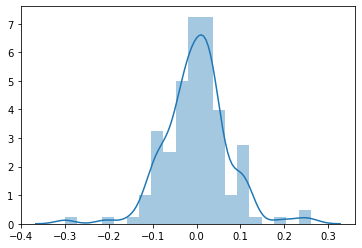

In [80]:
#defining y_train_pred using lm model
y_train_pred = lm.predict(x_train_rfe)
#res is the residual or the error
res = y_train - y_train_pred
sns.distplot(res)


## Predictions and evaluation of the test set

In [81]:
#create a list of only numeric variables
num_var = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
#transforming the test data test
df_test[num_var] = scaler.transform(df_test[num_var])

In [82]:
#defining the y_test and x_test
y_test = df_test.pop('price')
x_test = df_test

In [83]:
#NOW LET US USE OUR MODEL TO MAKE PREDICTIONS
x_test_new = x_test[x_train_new.columns]
x_test_new = sm.add_constant(x_test_new)


In [84]:
#defining y_test_pred using lm model
y_test_pred = lm.predict(x_test_new)

In [85]:
#defining r2 score using sklearn library
r2_score(y_true = y_test ,y_pred = y_test_pred)

0.8149978069144491

## Model Evaluation

Text(0, 0.5, 'y_pred')

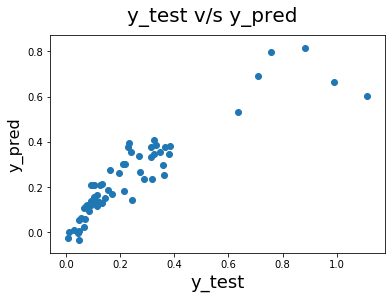

In [86]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test v/s y_pred',fontsize=20)
plt.xlabel('y_test',fontsize = 18)
plt.ylabel('y_pred',fontsize = 16)